# Group 93: NLP Assignment | Problem Statement 30 | Chat bot using Babi Data Set from Facebook Research

Partipants are:
1. Avinash Kumar (2021FC04746)
2. Siddharth Vij (2021FC04507)
3. Sherwin Philip (2021FC04106)
4. Dhande Saurabh Arunrao (2021FC04700)

## Objective


To train a QA Chatbot using the Babi Data Set from Facebook Research, Below links are for reference make sure to read and understand the architecture of the networks.

Following steps are performed to full fill the requirement of this assignment on the given template:

1. Loading the train and test data 

2. Initial understanding of the data, printing the story, question and answer in the first record of training set 

3. Create a vocab object to hold all the vocabulary of train and test data 

4. Vectorize and tokenize the data

5. Model Creation using Input encoder m, Input encoder c and Question encoder

6. Printing of predicted answer and probability of certainty of below story:
        <br>Story: "Daniel left the hallway. Sandra dropped the football in the Kitchen."
        <br>Question: "Is the football in the hallway ?"


___
# Question and Answer Chat Bots

----

------

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [131]:
import pickle
import numpy as np

Q1. Write code to unpickle the train_qa and test_qa datasets below

In [132]:
# Unpickling training dataset
#fill your code here

with open("train_qa.txt", "rb") as fTrain:   
    trainData =  pickle.load(fTrain)

In [133]:
# Unpickling test dataset
#fill your code here

with open("test_qa.txt", "rb") as fTest:   
    testData =  pickle.load(fTest)

----

## Exploring the Format of the Data

Q2. Identify the type of traindata and test data

In [134]:
#type of train data
#fill your code here
#type of test data
#fill your code here
print(f"Type of train data is: {type(trainData)}")
print(f"Type of test data is: {type(testData)}")

Type of train data is: <class 'list'>
Type of test data is: <class 'list'>


Q3. Identify the length of test and train data

In [135]:
#length of train data
#fill your code here
#length of test data
#fill your code here

print(f"Length of train data is: {len(trainData)}")
print(f"Length of test data is: {len(testData)}")

Length of train data is: 10000
Length of test data is: 1000


Q4. Print the first record in train data and print the first record as scentences with punctuation marks, separate the question and the answer

From the previous section we have observed that train data has 10,000 sample records. 

In [136]:
# first entry in the train data
#fill your code here
s = " ".join(trainData[0][0])
q = " ".join(trainData[0][1])
a = trainData[0][2]
print(f"Story is: {s}\n\nQuestion is: {q}\n\nAnswer is: {a}")

Story is: Mary moved to the bathroom . Sandra journeyed to the bedroom .

Question is: Is Sandra in the hallway ?

Answer is: no


In [137]:
data=""
qnaDict = dict()
print('Story from the train data:')
for phrases in trainData:
    for phrase in phrases:
        if phrase!='yes' and phrase!='no':
            for word in phrase:
                if (word!='.'):
                    if (word!='?'):
                        data+= word + ' '
                    else:
                        print()
                        question = data[:-1]+word
                        qnaDict[question] = ""
                else:
                    print(data[:-1]+word)
                    data=''
        else:
            qnaDict[question] = phrase

Story from the train data:
Mary moved to the bathroom.
Sandra journeyed to the bedroom.

Is Sandra in the hallway Mary moved to the bathroom.
Sandra journeyed to the bedroom.
Mary went back to the bedroom.
Daniel went back to the hallway.

Is Daniel in the bathroom Mary moved to the bathroom.
Sandra journeyed to the bedroom.
Mary went back to the bedroom.
Daniel went back to the hallway.
Sandra went to the kitchen.
Daniel went back to the bathroom.

Is Daniel in the office Mary moved to the bathroom.
Sandra journeyed to the bedroom.
Mary went back to the bedroom.
Daniel went back to the hallway.
Sandra went to the kitchen.
Daniel went back to the bathroom.
Daniel picked up the football there.
Daniel went to the bedroom.

Is Daniel in the bedroom Mary moved to the bathroom.
Sandra journeyed to the bedroom.
Mary went back to the bedroom.
Daniel went back to the hallway.
Sandra went to the kitchen.
Daniel went back to the bathroom.
Daniel picked up the football there.
Daniel went to the b

In [138]:
print("Question and Answer combined dictionary is as follows:\n\n")
qnaDict

Question and Answer combined dictionary is as follows:




{'Is Sandra in the hallway?': 'no',
 'Is Daniel in the bathroom?': 'no',
 'Is Daniel in the office?': 'yes',
 'Is Daniel in the bedroom?': 'yes',
 'Is Mary in the bedroom?': 'yes',
 'Is Sandra in the office?': 'yes',
 'Is Sandra in the bathroom?': 'no',
 'Is Mary in the kitchen?': 'no',
 'Is Mary in the hallway?': 'yes',
 'Is Mary in the garden?': 'no',
 'Is Sandra in the kitchen?': 'no',
 'Is Sandra in the bedroom?': 'no',
 'Is Daniel in the kitchen?': 'yes',
 'Is John in the office?': 'no',
 'Is John in the bathroom?': 'no',
 'Is John in the bedroom?': 'yes',
 'Is Mary in the bathroom?': 'no',
 'Is Sandra in the garden?': 'no',
 'Is Mary in the office?': 'no',
 'Is John in the garden?': 'yes',
 'Is Daniel in the hallway?': 'yes',
 'Is John in the hallway?': 'no',
 'Is Daniel in the garden?': 'no',
 'Is John in the kitchen?': 'no'}

In [139]:
#Separate the question 
#fill your code here

print("All the questions are:\n")
for q,a in qnaDict.items():
    print(q)

All the questions are:

Is Sandra in the hallway?
Is Daniel in the bathroom?
Is Daniel in the office?
Is Daniel in the bedroom?
Is Mary in the bedroom?
Is Sandra in the office?
Is Sandra in the bathroom?
Is Mary in the kitchen?
Is Mary in the hallway?
Is Mary in the garden?
Is Sandra in the kitchen?
Is Sandra in the bedroom?
Is Daniel in the kitchen?
Is John in the office?
Is John in the bathroom?
Is John in the bedroom?
Is Mary in the bathroom?
Is Sandra in the garden?
Is Mary in the office?
Is John in the garden?
Is Daniel in the hallway?
Is John in the hallway?
Is Daniel in the garden?
Is John in the kitchen?


In [140]:
#separate the Answer 
#fill your code here

print("All the answers to above questions are:\n")
for q,a in qnaDict.items():
    print(a)

All the answers to above questions are:

no
no
yes
yes
yes
yes
no
no
yes
no
no
no
yes
no
no
yes
no
no
no
yes
yes
no
no
no


-----

## Setting up Vocabulary of All Words

Q5. fill the code where ever required

In [141]:
vocab = set()

Here all data would be combination of both, train data and test data

In [142]:

#concatenate the train and test data as 'all_data'
#fill your code here
all_data = trainData+testData

In [143]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [144]:
vocab.add('no')
vocab.add('yes')

In [145]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [146]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [147]:
# find the maximum story length
#fill your code here
max_story_len = max([len(myData[0]) for myData in all_data])
print(f"Max story length would be: {max_story_len}")

Max story length would be: 156


In [148]:
# find the maximum question length
#fill your code here
max_question_len = max([len(data[1]) for data in all_data])
print(f"Max question length would be: {max_question_len}")

Max question length would be: 6


## Vectorizing the Data

Q6 Vectorize and tokenize the data

In [149]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [150]:
#The below code form template is throwing Import error, hence importing with another alternative
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [151]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab) #fill your code here

In [152]:
tokenizer.word_index

{'sandra': 1,
 'is': 2,
 'football': 3,
 'went': 4,
 'in': 5,
 'journeyed': 6,
 'down': 7,
 'no': 8,
 'travelled': 9,
 'bathroom': 10,
 'picked': 11,
 'the': 12,
 'back': 13,
 'bedroom': 14,
 'milk': 15,
 'hallway': 16,
 'office': 17,
 'apple': 18,
 'put': 19,
 'took': 20,
 'there': 21,
 'grabbed': 22,
 'left': 23,
 'daniel': 24,
 'yes': 25,
 'moved': 26,
 'got': 27,
 '?': 28,
 'kitchen': 29,
 '.': 30,
 'mary': 31,
 'garden': 32,
 'dropped': 33,
 'discarded': 34,
 'john': 35,
 'to': 36,
 'up': 37}

In [153]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in trainData:
    train_story_text.append(story)
    train_question_text.append(question)

In [154]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [155]:
len(train_story_text)

10000

In [156]:
len(train_story_seq)

10000

In [157]:
# word_index = tokenizer.word_index

### Functionalize Vectorization

In [158]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [159]:
inputs_train, queries_train, answers_train = vectorize_stories(trainData)

In [160]:
inputs_test, queries_test, answers_test = vectorize_stories(testData)

In [161]:
inputs_test

array([[ 0,  0,  0, ..., 12, 14, 30],
       [ 0,  0,  0, ..., 12, 32, 30],
       [ 0,  0,  0, ..., 12, 32, 30],
       ...,
       [ 0,  0,  0, ..., 12, 18, 30],
       [ 0,  0,  0, ..., 12, 32, 30],
       [ 0,  0,  0, ..., 18, 21, 30]])

In [162]:
queries_test

array([[ 2, 35,  5, 12, 29, 28],
       [ 2, 35,  5, 12, 29, 28],
       [ 2, 35,  5, 12, 32, 28],
       ...,
       [ 2, 31,  5, 12, 14, 28],
       [ 2,  1,  5, 12, 32, 28],
       [ 2, 31,  5, 12, 32, 28]])

In [163]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [165]:
tokenizer.word_index['yes']

25

In [166]:
tokenizer.word_index['no']

8

## Creating the Model

In [167]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [168]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders
Q7 Create the layers as per the instructions given in the problem statement

Encoding is a process of feature engineering in NLP which converts variable length text into a fixed length vectors. It is one of the important part of neural network which helps to reduce dimensionality of the data to make the learning step more efficient. 

<br>It further helps transformer to use these encoded data to generate predictions.

### Input Encoder m

Input encoder m which is a sequential embedding layer with output dimension = 54 and dropout of 30%

Purpose: Input gets embedded to a sequence of vectors

In [169]:
#### Input gets embedded to a sequence of vectors
# Follow the instructions in problem statement
####This encoder will output:
#### (samples, story_maxlen, embedding_dim)

outputDimension = 54
dropout = 0.3

inputEncoder_m = Sequential()
inputEncoder_m.add(Embedding(input_dim=vocab_size,output_dim= outputDimension))
inputEncoder_m.add(Dropout(dropout))

### Input Encoder c

Input encoder c which is another sequential embedding layer with input_dim=vocab_size, output_dim=maximum_question_length and dropout of 30%

Purpose: To embed the input into a sequence of vectors of size query_maximumlength

In [170]:
# embed the input into a sequence of vectors of size query_maxlen
# Follow the instructions in the problem statement
# output: (samples, story_maxlen, query_maxlen)
inputEncoder_c = Sequential()
inputEncoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
inputEncoder_c.add(Dropout(dropout))

### Question Encoder

Question encoder which is another sequential embedding layer with input_dim=vocab_size,
                               <br>output_dim=64,
                               <br>input_length=maximum_question_length 
                               <br>and dropout of 30%

In [171]:
# embed the question into a sequence of vectors
# Follow the instructions in the problem statement
# output: (samples, query_maxlen, embedding_dim)
outputDimensionQuestion = 64

questionEncoder = Sequential()
questionEncoder.add(Embedding(input_dim=vocab_size,
                               output_dim=outputDimension,
                               input_length=max_question_len))
questionEncoder.add(Dropout(dropout))

Note: For question encoder's output dimension, we are keeping it same as input encoder m; since there is a dimension mismatch issue in dot product. We were getting below Value Error:

ValueError: Incompatible input shapes: axis values 54 (at axis 2) != 64 (at axis 2). Full input shapes: (None, 156, 54), (None, 6, 64)

### Encode the Sequences

In [172]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = inputEncoder_m(input_sequence)
input_encoded_c = inputEncoder_c(input_sequence)
question_encoded = questionEncoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [173]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [174]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [175]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [176]:
answer

<KerasTensor: shape=(None, 6, 210) dtype=float32 (created by layer 'concatenate_2')>

In [177]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [178]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [179]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [180]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_6 (Sequential)      (None, None, 54)     2052        ['input_5[0][0]']                
                                                                                                  
 sequential_8 (Sequential)      (None, 6, 54)        2052        ['input_6[0][0]']                
                                                                                            

In [181]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 7s 15ms/step - loss: 0.9068 - accuracy: 0.4936 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 14ms/step - loss: 0.7014 - accuracy: 0.4968 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 5s 17ms/step - loss: 0.6973 - accuracy: 0.4967 - val_loss: 0.6950 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6955 - accuracy: 0.5053 - val_loss: 0.7012 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 6s 19ms/step - loss: 0.6959 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 6s 18ms/step - loss: 0.6952 - accuracy: 0.5037 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6956 - accuracy: 0.4996 - val_loss: 0.6942 - val_accuracy:

### Saving the Model

In [182]:
filename = 'chatbot_120_epochs_group93.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

Q8 Write your code to plot the training history

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

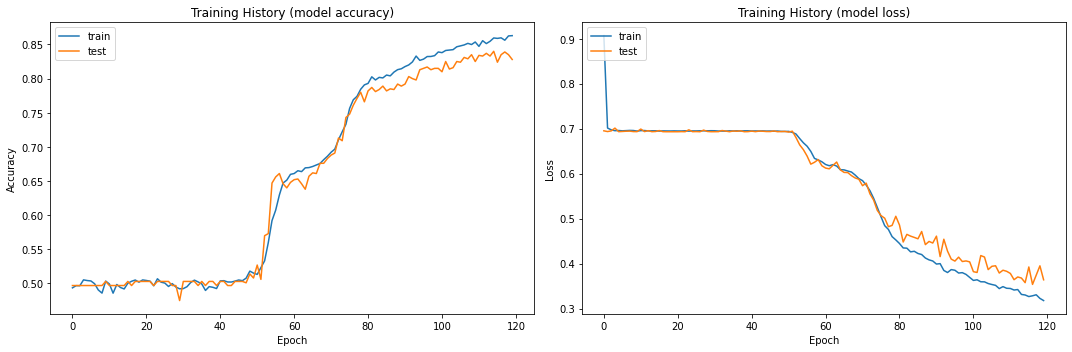

In [184]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training History (model accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History (model loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

The two graphs are model accuracy (Accuracy vs Epoch) and model loss (Loss vs Epoch) respectively. From Model Accuracy graph, we observe that Train and Test are closer before 60th epoch and after that the accuracy of train started increasing.
<p>Alternatively, in second graph (Model loss), loss of train data was almost constant till it became equally closer with test data and train loss further keep on decreasing till 120th epoch whereas for test data loss was vibrating from 90th epoch till 120th epoch.

### Evaluating on Given Test Set

In [185]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 4ms/step


In [186]:
testData[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [187]:
story =' '.join(word for word in testData[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [188]:
query = ' '.join(word for word in testData[0][1])
print(query)

Is John in the kitchen ?


In [189]:
print("True Test Answer from Data is:",testData[0][2])

True Test Answer from Data is: no


In [190]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9930333


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [191]:
# Q8 use the model for predicting the given strory and question given in the problem statement

qStory = "Daniel left the hallway . Sandra dropped the football in the Kitchen ."
ques = "Is the football in the hallway ?"

In [192]:
qStory.split()

['Daniel',
 'left',
 'the',
 'hallway',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'Kitchen',
 '.']

In [193]:
ques.split()

['Is', 'the', 'football', 'in', 'the', 'hallway', '?']

In [194]:
testDataList = [(qStory.split(),ques.split(),'no')]

In [195]:
print(testDataList)

[(['Daniel', 'left', 'the', 'hallway', '.', 'Sandra', 'dropped', 'the', 'football', 'in', 'the', 'Kitchen', '.'], ['Is', 'the', 'football', 'in', 'the', 'hallway', '?'], 'no')]


In [196]:
qStory,ques,ans = vectorize_stories(testDataList)

In [197]:
qStory,ques,ans

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,
         23, 12, 16, 30,  1, 33, 12,  3,  5, 12, 29, 30]]),
 array([[12,  3,  5, 12, 16, 28]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]]))

In [198]:
predictedResult = model.predict(([ qStory, ques]))

1/1 [==============================] - 0s 30ms/step


In [199]:
predictedResult

array([[4.2024388e-09, 4.7354671e-09, 4.4134691e-09, 4.9954245e-09,
        3.9702459e-09, 5.3407359e-09, 5.2887632e-09, 5.9719358e-09,
        9.9713612e-01, 4.0614294e-09, 4.0744879e-09, 3.7508956e-09,
        5.2197353e-09, 4.7371018e-09, 5.5818510e-09, 4.8720143e-09,
        4.2044110e-09, 4.3469015e-09, 4.3308712e-09, 4.3999036e-09,
        5.3413980e-09, 5.1248041e-09, 4.8898325e-09, 4.4456163e-09,
        4.7342659e-09, 2.8638397e-03, 5.6214149e-09, 4.4912727e-09,
        5.0418207e-09, 4.6093795e-09, 3.8529855e-09, 5.0903659e-09,
        4.5709889e-09, 4.3495225e-09, 4.7848214e-09, 3.3346716e-09,
        4.4695749e-09, 4.8929119e-09]], dtype=float32)

In [200]:
maxVal = np.argmax(predictedResult[0])
maxVal

8

In [201]:
for key, val in tokenizer.word_index.items():
    if val == maxVal:
        k = key

print("Predicted Answer:", k)
print("Probability of certainity: ", pred_results[0][maxVal])

Predicted Answer: no
Probability of certainity:  0.9930333


## Conclusion

1. Train and Test data type are of list type
2. We segregetted train data and extracted the story, question and answer stored within touples
3. Further, we set up the vocabulary of all the unique words, along with our yes and no answer
4. We then extracted max question length and max story length, these two informations are further used in Functionalize vectorization process and in Model creation steps
5. In further steps, we used keras library to encode the model
6. We faced error in dot product since Question encoder output dimension was of different value. So to resolve this error we just made Input encoder m output dimension for Question encoder output dimension
7. There are 2 input layers with softmax activation function was given in the template. It was further decoded using LSTM
8. There are 36,690 total and trainable parameters are observed
9. Finally the accuracy observed was 99%
10. The model execution details are stored in a separate file- chatbot_120_epochs_group93.h5

# Great Job!